Demo: Generating Synthetic data on the Iris Dataset Using Dittto

In [ ]:
# Install dittto
!pip install dittto

In [1]:
# Importing the libraries
from autoencoder import generate_synthetic_data 
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Understanding the generate_synthetic_data function
help(generate_synthetic_data)

Help on function generate_synthetic_data in module autoencoder:

generate_synthetic_data(model_name: str, original_df: pandas.core.frame.DataFrame, minority_class_column: str = 'class', minority_class_label: str = '0', decoder_activation: str = 'sigmoid', epochs: int = 100)
    Generates synthetic data using an autoencoder model.
    
    Args:
        model_name (str): Name of the autoencoder model to use. Valid options are 'single_encoder', 'balanced', and 'heavy_decoder'.
        original_df (pd.DataFrame): Original dataset to generate synthetic data from.
        minority_class_column (str, optional): Name of the column containing the minority class label. Defaults to 'class'.
        minority_class_label (str, optional): Label of the minority class. Defaults to '0'.
        decoder_activation (str, optional): Activation function for the decoder layers. Defaults to 'sigmoid'.
        epochs (int, optional): Number of epochs to train the autoencoder model. Defaults to 100.
    
    

In [3]:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to pandas dataframe
original_df = pd.DataFrame(X, columns=iris.feature_names)
original_df['class'] = y

# Normalize data between 0 and 1
scaler = MinMaxScaler()
original_df[original_df.columns] = scaler.fit_transform(original_df[original_df.columns])

# Build dummy_df with 25 samples from class 1 and 50 samples from class 0
# We will generate 25 synthetic samples from class 1
class_0 = original_df[original_df['class'] == 0]
class_1 = original_df[original_df['class'] == 1]
class_1 = class_1.sample(n=25, random_state=42)
dummy_df = pd.concat([class_1, class_0])


In [5]:
# Verify original_df
original_df['class'].value_counts()

class
0.0    50
0.5    50
1.0    50
Name: count, dtype: int64

In [9]:
# Verify dummy_df
dummy_df['class'].value_counts()

class
0.0    50
1.0    25
Name: count, dtype: int64

In [24]:
# Generate synthetic data
synthetic_df, generated_data, minority_df, majority_df = generate_synthetic_data(model_name='balanced', original_df=dummy_df, minority_class_column='class', minority_class_label='1.0', decoder_activation='sigmoid', epochs=300)

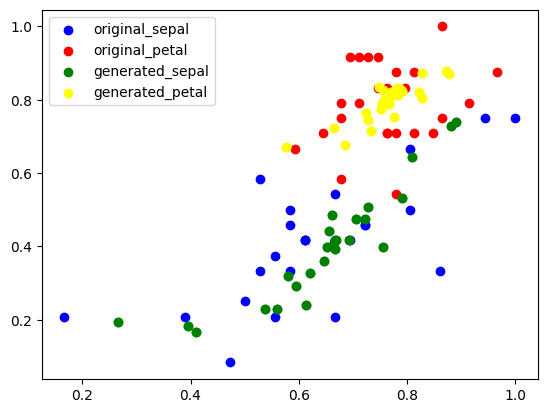

In [25]:
# Plot Scatterplots with original and generated data
plt.scatter(class_1['sepal length (cm)'], class_1['sepal width (cm)'], color='blue')
plt.scatter(class_1['petal length (cm)'], class_1['petal width (cm)'], color='red')

plt.scatter(generated_data['sepal length (cm)'], generated_data['sepal width (cm)'], color='green')
plt.scatter(generated_data['petal length (cm)'], generated_data['petal width (cm)'], color='yellow')

plt.legend(['original_sepal', 'original_petal', 'generated_sepal', 'generated_petal'])
plt.show()

In [ ]:
# Generate synthetic data
synthetic_df, generated_data, minority_df, majority_df = generate_synthetic_data(model_name='balanced', original_df=dummy_df, minority_class_column='class', minority_class_label='1.0', decoder_activation='sigmoid', epochs=600)

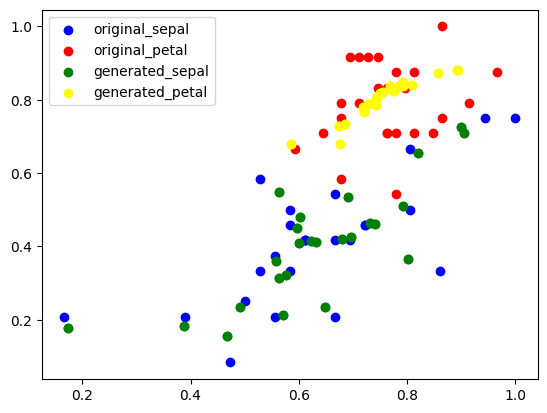

In [27]:
# Plot Scatterplots with original and generated data
plt.scatter(class_1['sepal length (cm)'], class_1['sepal width (cm)'], color='blue')
plt.scatter(class_1['petal length (cm)'], class_1['petal width (cm)'], color='red')

plt.scatter(generated_data['sepal length (cm)'], generated_data['sepal width (cm)'], color='green')
plt.scatter(generated_data['petal length (cm)'], generated_data['petal width (cm)'], color='yellow')

plt.legend(['original_sepal', 'original_petal', 'generated_sepal', 'generated_petal'])
plt.show()